In [1]:
import pandas as pd

# Load the data
data = pd.read_csv('../data/cleaned_data.csv')

# Inspect the first few rows
print(data.head())

# Summary of the dataset
print(data.info())


C:\Users\user\AppData\Local\Temp\ipykernel_17880\1368113507.py:4: DtypeWarning: Columns (10,11,18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/cleaned_data.csv')


   UnderwrittenCoverID  PolicyID TransactionMonth  IsVATRegistered  \
0               145249     12827       2015-03-01             True   
1               145249     12827       2015-05-01             True   
2               145249     12827       2015-07-01             True   
3               145255     12827       2015-05-01             True   
4               145255     12827       2015-07-01             True   

  Citizenship          LegalType Title Language                 Bank  \
0     Unknown  Close Corporation    Mr  English  First National Bank   
1     Unknown  Close Corporation    Mr  English  First National Bank   
2     Unknown  Close Corporation    Mr  English  First National Bank   
3     Unknown  Close Corporation    Mr  English  First National Bank   
4     Unknown  Close Corporation    Mr  English  First National Bank   

       AccountType  ...            CoverGroup              Section  \
0  Current account  ...  Comprehensive - Taxi  Motor Comprehensive   
1  Cur

In [2]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])


Bank                   145961
AccountType             40232
MaritalStatus          994467
Gender                 950526
make                      552
CustomValueEstimate    779642
CapitalOutstanding        281
WrittenOff             641901
Rebuilt                641901
Converted              641901
dtype: int64


In [4]:
# Impute missing values for categorical columns
data['Bank'] = data['Bank'].fillna(data['Bank'].mode()[0])
data['AccountType'] = data['AccountType'].fillna(data['AccountType'].mode()[0])
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

# Impute missing values for numeric columns
data['CustomValueEstimate'] = data['CustomValueEstimate'].fillna(data['CustomValueEstimate'].median())
data['CapitalOutstanding'] = data['CapitalOutstanding'].fillna(data['CapitalOutstanding'].median())

# Remove rows with missing critical columns
data = data.dropna(subset=['WrittenOff', 'Rebuilt', 'Converted'])


In [5]:
# Descriptive statistics
print(data.describe(include='all'))


        UnderwrittenCoverID       PolicyID TransactionMonth IsVATRegistered  \
count         358197.000000  358197.000000           358197          358197   
unique                  NaN            NaN               22               2   
top                     NaN            NaN       2015-08-01           False   
freq                    NaN            NaN            45853          355462   
mean          122202.354914    9068.234745              NaN             NaN   
std            80011.047491    6613.257206              NaN             NaN   
min               13.000000      14.000000              NaN             NaN   
25%            50406.000000    3870.000000              NaN             NaN   
50%           112736.000000    7190.000000              NaN             NaN   
75%           195582.000000   13811.000000              NaN             NaN   
max           301175.000000   23246.000000              NaN             NaN   

       Citizenship   LegalType   Title Language    

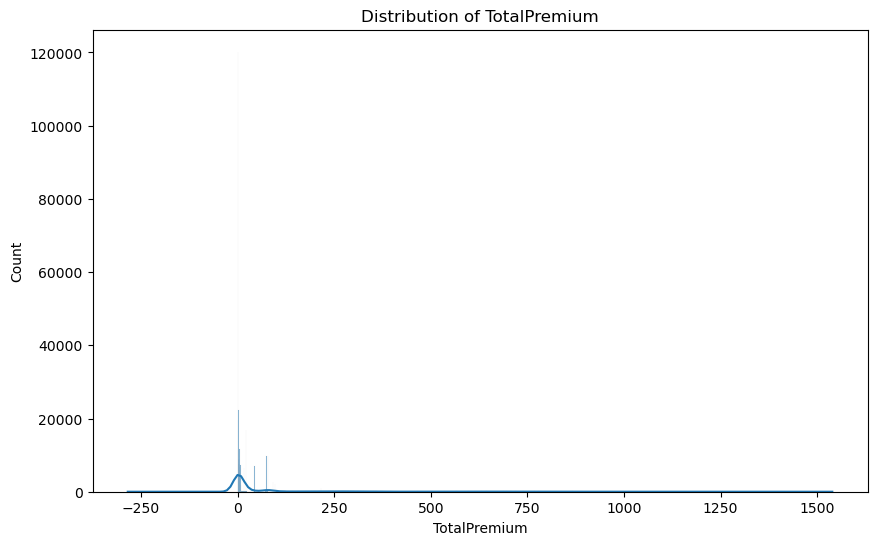

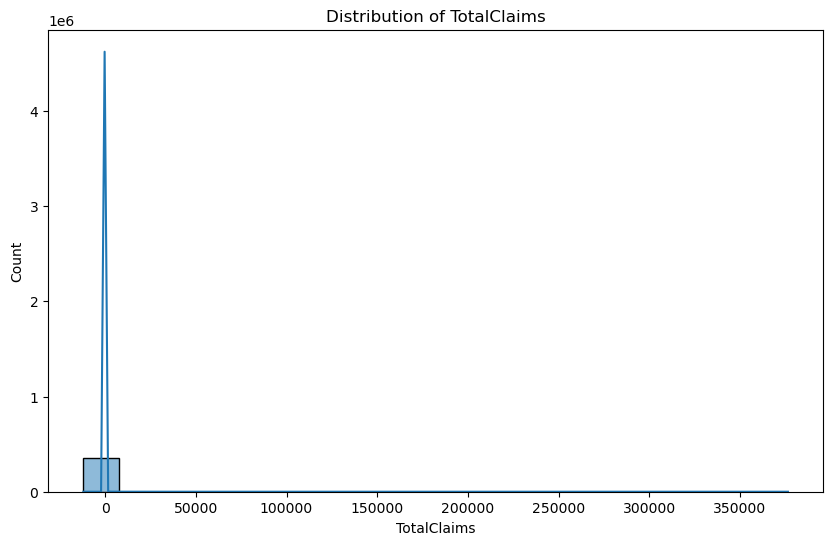

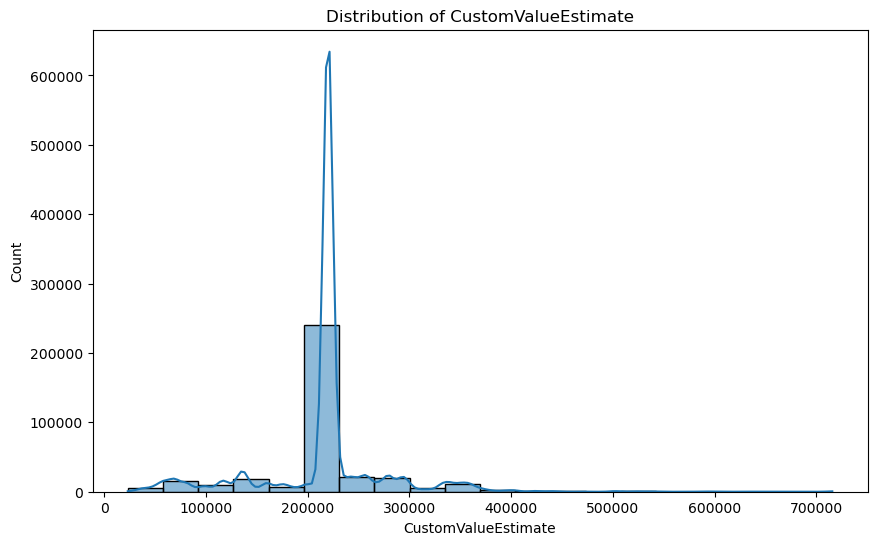

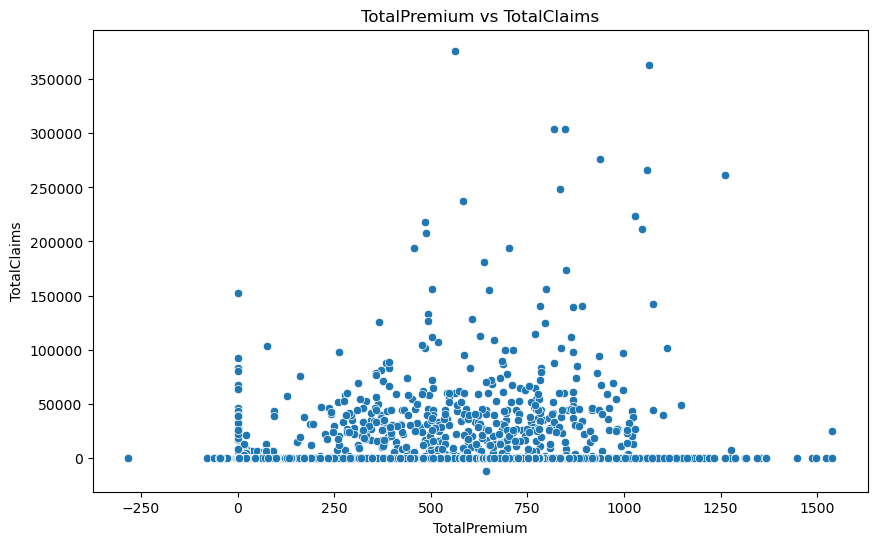

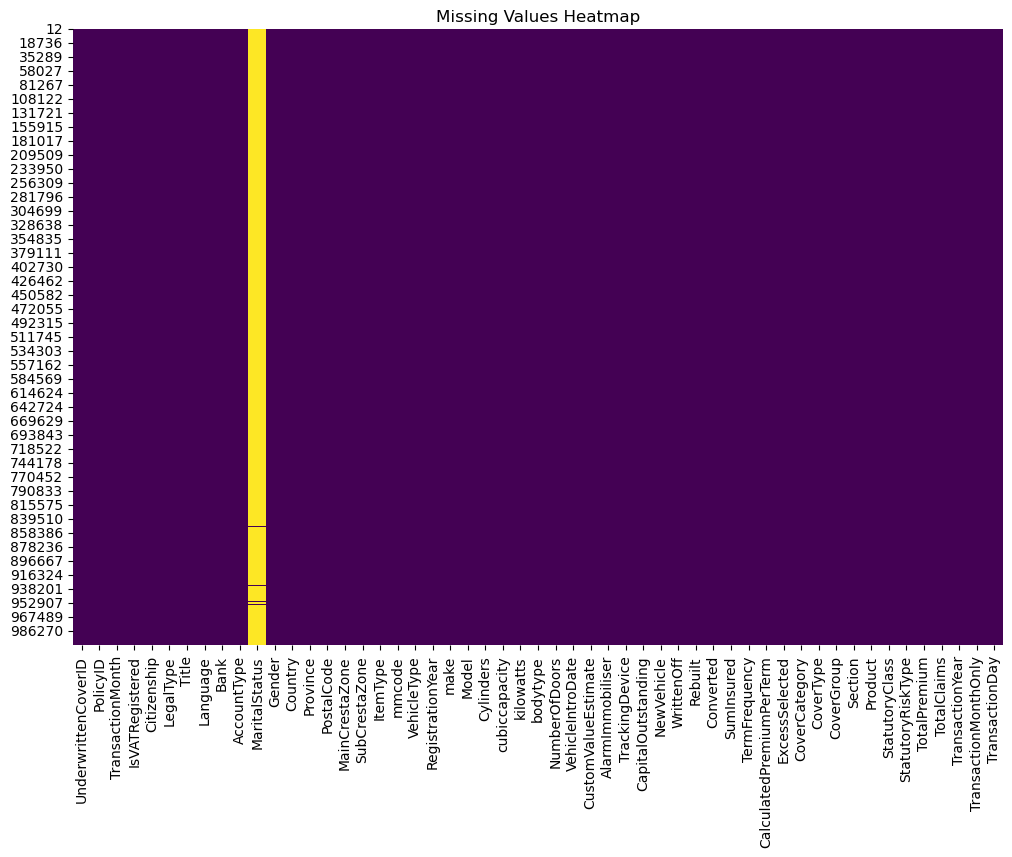

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate analysis: Distribution of numerical columns
for col in ['TotalPremium', 'TotalClaims', 'CustomValueEstimate']:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Bivariate analysis: Relationship between TotalPremium and TotalClaims
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', data=data)
plt.title('TotalPremium vs TotalClaims')
plt.show()

# Missing values heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [21]:
import pandas as pd
from scipy.stats import f_oneway

# Load the data
# data = pd.read_csv('your_data_file.csv')  # Make sure to load your data

# Ensure 'Province' and 'TotalClaims' have no missing values
province_data = data[['Province', 'TotalClaims']].dropna()

# Group data by Province
grouped_data = province_data.groupby('Province')['TotalClaims'].apply(list)

# Perform ANOVA
anova_result = f_oneway(*grouped_data)

# Output the result
print(f"ANOVA F-statistic: {anova_result.statistic}, P-value: {anova_result.pvalue}")

# Interpret the result
alpha = 0.05  # common significance level

if anova_result.pvalue < alpha:
    print("There are statistically significant differences in the risk (TotalClaims) between different provinces.")
    print("This suggests that the risk levels are not the same across all provinces, and the differences observed are unlikely due to chance.")
else:
    print("There are no statistically significant differences in the risk (TotalClaims) between different provinces.")
    print("This suggests that any observed differences in risk levels are likely due to random variation and not a real effect.")


ANOVA F-statistic: 1.6053662308002534, P-value: 0.11737378716999708
There are no statistically significant differences in the risk (TotalClaims) between different provinces.
This suggests that any observed differences in risk levels are likely due to random variation and not a real effect.


In [20]:
import pandas as pd
from scipy.stats import f_oneway

# Load the data
# data = pd.read_csv('your_data_file.csv')  # Make sure to load your data

# Ensure 'PostalCode' and 'TotalClaims' have no missing values
zip_code_data = data[['PostalCode', 'TotalClaims']].dropna()

# Group data by PostalCode
grouped_data = zip_code_data.groupby('PostalCode')['TotalClaims'].apply(list)

# Perform ANOVA
anova_result = f_oneway(*grouped_data)

# Output the result
print(f"ANOVA F-statistic: {anova_result.statistic}, P-value: {anova_result.pvalue}")

# Interpret the result
alpha = 0.05  # common significance level

if anova_result.pvalue < alpha:
    print("There are statistically significant differences in the risk (TotalClaims) between different zip codes.")
    print("This suggests that the risk levels are not the same across all zip codes, and the differences observed are unlikely due to chance.")
else:
    print("There are no statistically significant differences in the risk (TotalClaims) between different zip codes.")
    print("This suggests that any observed differences in risk levels are likely due to random variation and not a real effect.")


ANOVA F-statistic: 0.7061352757342556, P-value: 0.9999999937205284
There are no statistically significant differences in the risk (TotalClaims) between different zip codes.
This suggests that any observed differences in risk levels are likely due to random variation and not a real effect.


In [19]:
from scipy.stats import ttest_ind

# Ensure 'PostalCode' and 'TotalPremium' have no missing values (you can adjust the profit column if it's different)
zip_code_data = data[['PostalCode', 'TotalPremium']].dropna()

# Check the number of unique postal codes
unique_zip_codes = zip_code_data['PostalCode'].unique()
print(f"Unique postal codes available: {len(unique_zip_codes)}")

# Select two postal codes to compare
# Replace '12345' and '67890' with actual postal codes from your data
if len(unique_zip_codes) >= 2:
    zip_code_1 = zip_code_data[zip_code_data['PostalCode'] == unique_zip_codes[0]]['TotalPremium']
    zip_code_2 = zip_code_data[zip_code_data['PostalCode'] == unique_zip_codes[1]]['TotalPremium']

    # Perform the t-test
    t_stat, p_value = ttest_ind(zip_code_1, zip_code_2)

    # Output the result with explanation
    print(f"T-statistic: {t_stat}, P-value: {p_value}")

    # Interpret the result
    alpha = 0.05  # common significance level

    if p_value < alpha:
        print(f"There is a statistically significant difference in the profit margin (TotalPremium) "
              f"between postal codes {unique_zip_codes[0]} and {unique_zip_codes[1]}.")
        print("This suggests that the difference in margins is unlikely due to chance, and these postal codes have different profit behaviors.")
    else:
        print(f"There is no statistically significant difference in the profit margin (TotalPremium) "
              f"between postal codes {unique_zip_codes[0]} and {unique_zip_codes[1]}.")
        print("This suggests that any observed differences in profit margins are likely due to random variation.")
else:
    print("Not enough postal codes for comparison. Please ensure you have at least two postal codes with sufficient data.")


Unique postal codes available: 605
T-statistic: -1.409450833222228, P-value: 0.1606426024130974
There is no statistically significant difference in the profit margin (TotalPremium) between postal codes 1513 and 1577.
This suggests that any observed differences in profit margins are likely due to random variation.


In [16]:
import pandas as pd
from scipy.stats import ttest_ind

# Load data (assuming 'data' is already loaded and cleaned)
# Sample: data = pd.read_csv("insurance_data.csv")

# Check for missing values in 'Gender' and 'TotalClaims' columns
gender_claims_data = data[['Gender', 'TotalClaims']].dropna()

# Group data by Gender
male_claims = gender_claims_data[gender_claims_data['Gender'] == 'Male']['TotalClaims']
female_claims = gender_claims_data[gender_claims_data['Gender'] == 'Female']['TotalClaims']

# Perform independent t-test between male and female TotalClaims
t_statistic, p_value = ttest_ind(male_claims, female_claims)

# Output the test results
print(f"T-statistic: {t_statistic:.4f}, P-value: {p_value:.4f}")

# Interpretation of the result based on the p-value
if p_value < 0.05:
    print("The difference in TotalClaims between men and women is statistically significant.")
    print("AlphaCare Insurance Solutions should consider adjusting premiums or product offerings based on gender.")
else:
    print("There is no statistically significant difference in TotalClaims between men and women.")
    print("Gender does not play a significant role in claim behavior. Focus on other factors for premium adjustments.")


T-statistic: 0.4121, P-value: 0.6802
There is no statistically significant difference in TotalClaims between men and women.
Gender does not play a significant role in claim behavior. Focus on other factors for premium adjustments.
